# Библиотеки Python для визуализации данных  
*Выполнение заданий представлено Кузиной Екатериной*

In [327]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [328]:
df = pd.read_csv('/content/DataEngineer.csv')
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1


#### Просмотр данных

In [329]:
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [330]:
df['Founded'].unique()

array([2009, 1998, 2003, 2000, 1914, 2012, 2010, 2006, 1987, 2007, 1990,
       2011,   -1, 1943, 1853, 1806, 1965, 2016, 1999, 2015, 1937, 2008,
       1993, 2014, 1929, 1896, 1997, 1938, 1976, 2018, 2017, 2004, 1994,
       1989, 1981, 1971, 2001, 1946, 2002, 2013, 1845, 1923, 1991, 1880,
       1799, 1963, 2005, 1995, 1865, 1625, 1967, 1884, 1996, 1852, 1954,
       1906, 1902, 1975, 2019, 1916, 1936, 1872, 1949, 1969, 1979, 1983,
       1931, 1948, 1992, 1935, 1927, 1974, 1984, 1988, 1889, 1919, 1918,
       1882, 1926, 1945, 1837, 1980, 1920, 1849, 1961, 1956, 1940, 1985,
       1951, 1947, 1912, 1897, 1885, 1962, 1966, 1911, 1960, 1901, 1970,
       1972, 1864, 1833, 1922, 1973, 1986, 1925, 1982, 1968, 1939, 1855,
       1830, 1952, 1905, 1887, 1977, 1874, 1955, 1868, 1958, 2020, 1978,
       1913, 1869, 1812, 1950, 1915, 1903, 1850, 1908, 1892, 1841, 1944,
       1870, 1894, 1917, 1933, 1898])

In [331]:
df[df['Competitors'] == '-1'].count()

Job Title            1749
Salary Estimate      1749
Job Description      1749
Rating               1749
Company Name         1749
Location             1749
Headquarters         1749
Size                 1749
Founded              1749
Type of ownership    1749
Industry             1749
Sector               1749
Revenue              1749
Competitors          1749
Easy Apply           1749
dtype: int64

In [332]:
df['Easy Apply'].unique()

array(['-1', 'True'], dtype=object)

#### Палитра HH

In [333]:
color = ['#D6001C', '#FFFFFF']

In [334]:
sns.color_palette(color)

[(0.8392156862745098, 0.0, 0.10980392156862745), (1.0, 1.0, 1.0)]

In [335]:
colors7 = sns.blend_palette(color, n_colors=7)
colors7

[(0.8392156862745098, 0.0, 0.10980392156862745),
 (0.8656978085351787, 0.16470588235294117, 0.2564244521337947),
 (0.8928104575163399, 0.3333333333333333, 0.40653594771241824),
 (0.919923106497501, 0.5019607843137255, 0.5566474432910419),
 (0.9464052287581699, 0.6666666666666666, 0.7032679738562091),
 (0.9735178777393311, 0.8352941176470589, 0.8533794694348327),
 (1.0, 1.0, 1.0)]

## 1. Построить график компаний с самым большим кол-вом вакансий

In [336]:
import re

In [337]:
re.sub('\n.*$', '', 'Amazon\n3.9')

'Amazon'

In [338]:
vacs01 = df.groupby(by='Company Name')['Job Title'].count().reset_index().sort_values('Job Title', ascending=False, ignore_index=True)
vacs01 = vacs01[vacs01['Job Title'] > 8]
vacs01['Company Name'] = vacs01['Company Name'].apply(lambda x: re.sub('\n.*$', '', x))

In [339]:
import matplotlib.lines as lines

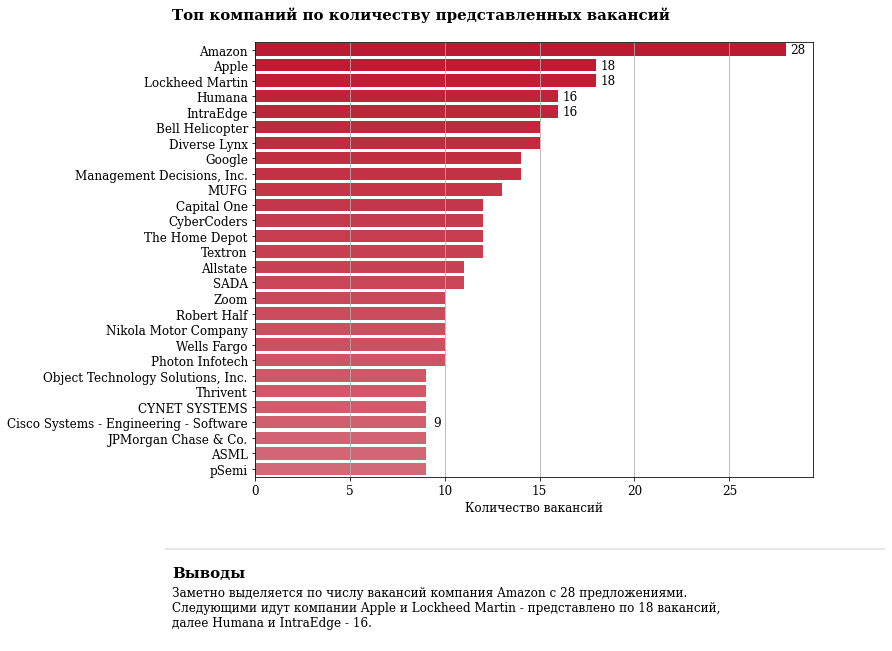

In [340]:
plt.rcParams.update({'font.size': 12, 'font.family':'serif'})
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.barplot(data=vacs01, y='Company Name', x='Job Title', palette=sns.blend_palette(color, n_colors=80))
plt.grid(axis='x')
plt.xlabel('Количество вакансий')
plt.ylabel('')

for i in [0,1,2,3,4,24]:
    ax.annotate(f"{vacs01['Job Title'][i]}", 
                   xy=(vacs01['Job Title'][i] + 0.6, i),
                   va = 'center', ha='center')   

fig.text(0.01, 0.92, 'Топ компаний по количеству представленных вакансий', fontsize=15, fontweight='bold', fontfamily='serif')

l1 = lines.Line2D([0, 1], [0, 0], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(0.01, -0.05, 'Выводы', fontsize=15, fontweight='bold')
fig.text(0.01, -0.16, '''
Заметно выделяется по числу вакансий компания Amazon с 28 предложениями. 
Следующими идут компании Apple и Lockheed Martin - представлено по 18 вакансий,
далее Humana и IntraEdge - 16.
''', fontsize=12, fontweight='light')
None

## 2. Построить график самых популярных названий в вакансиях

In [341]:
vacs02 = df.groupby(by='Job Title')['Salary Estimate'].count().reset_index().sort_values('Salary Estimate', ascending=False, ignore_index=True)
vacs02 = vacs02.rename(columns={'Salary Estimate': 'N_vacs'})

In [342]:
vacs02_big = vacs02[vacs02['N_vacs'] > 16]
len(vacs02_big)

6

In [343]:
vacs02[vacs02['N_vacs'] > 16]

,Job Title,N_vacs
0,Data Engineer,469
1,Senior Data Engineer,103
2,Software Engineer,93
3,Big Data Engineer,73
4,Sr. Data Engineer,35
5,Machine Learning Engineer,17


In [344]:
vacs02_other = vacs02[vacs02['N_vacs'] < 70]
val = vacs02_other['N_vacs'].sum()
vacs02_other = vacs02_big[vacs02['N_vacs'] > 70].append({'Job Title': 'Другие', 'N_vacs': 1738}, ignore_index = True)
vacs02_other

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Job Title,N_vacs
0,Data Engineer,469
1,Senior Data Engineer,103
2,Software Engineer,93
3,Big Data Engineer,73
4,Другие,1738


In [345]:
colors6 = np.array(list(colors7)[1:])

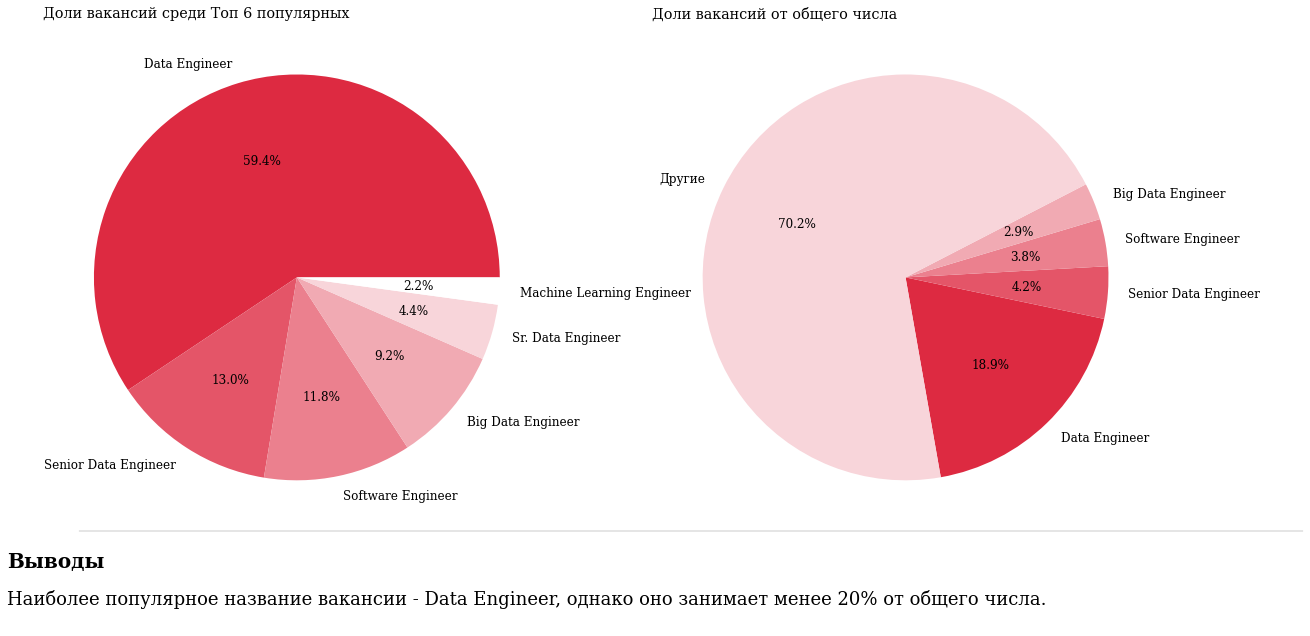

In [346]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].pie(vacs02_big['N_vacs'], labels=vacs02_big['Job Title'], colors = colors6, 
        autopct=lambda pct: "{:.1f}%".format(pct))
ax[0].set_title('Доли вакансий среди Топ 6 популярных', loc='left')

ax[1].pie(vacs02_other['N_vacs'], labels=vacs02_other['Job Title'], colors = colors6, 
        autopct=lambda pct: "{:.1f}%".format(pct), startangle=-80)
ax[1].set_title('Доли вакансий от общего числа', loc='left')

l1 = lines.Line2D([0.15, 1], [0.15, 0.15], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(0.1, 0.1, 'Выводы', fontsize=20, fontweight='bold')
fig.text(0.1, 0.02, '''
Наиболее популярное название вакансии - Data Engineer, однако оно занимает менее 20% от общего числа.
''', fontsize=18, fontweight='light')
None

## 3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [347]:
 vacs03 = df.groupby(by='Location')['Job Title'].count().reset_index().sort_values('Job Title', ascending=False, ignore_index=True)
 vacs03[vacs03['Job Title']>40]

,Location,Job Title
0,"Austin, TX",199
1,"Houston, TX",199
2,"San Diego, CA",195
3,"Chicago, IL",192
4,"San Antonio, TX",190
5,"New York, NY",187
6,"Philadelphia, PA",135
7,"Jacksonville, FL",122
8,"Phoenix, AZ",117
9,"Los Angeles, CA",106


In [348]:
vacs03_top = vacs03[vacs03['Job Title']>50]

In [349]:
colors3 = sns.blend_palette(color, n_colors=4)[:-1]
colors15 = sns.blend_palette(color, n_colors=15)

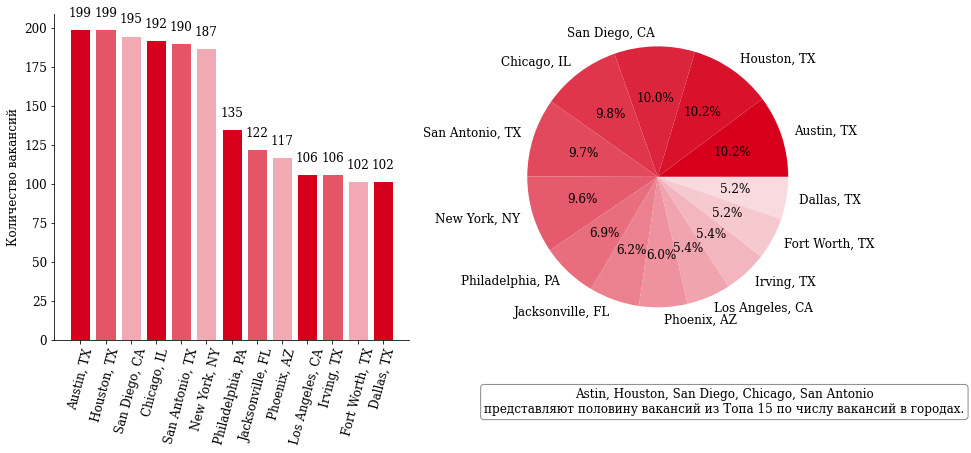

In [350]:
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].bar(x= vacs03_top['Location'], height = vacs03_top['Job Title'], 
        edgecolor='white', color = colors3)
ax[0].set_xticklabels(vacs03_top['Location'], rotation=75)

ax[0].set_ylabel('Количество вакансий')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
for i in range(0,13):
    ax[0].annotate(f"{vacs03_top['Job Title'][i]}", 
                   xy=(i, vacs03_top['Job Title'][i] + 10),
                   va = 'center', ha='center')   

ax[1].pie(vacs03_top['Job Title'], labels=vacs03_top['Location'], colors = colors15, 
        autopct=lambda pct: "{:.1f}%".format(pct))


an1 = ax[1].annotate('''Astin, Houston, San Diego, Chicago, San Antonio
представляют половину вакансий из Топа 15 по числу вакансий в городах.''',
                  xy=(5, 1.8), xycoords='polar',
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
None

## ...

## Построить описаний вакансий облако тегов, исследовать самые популярные слова

In [351]:
from wordcloud import WordCloud
import random
from PIL import Image

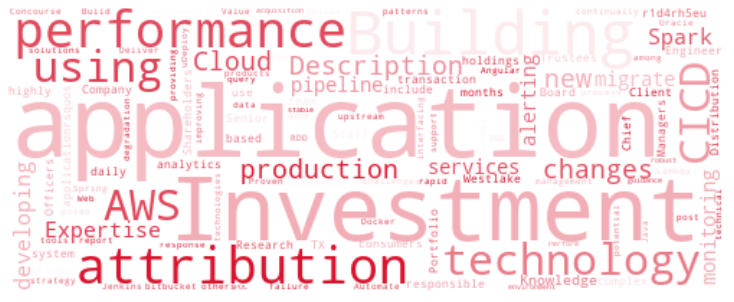

In [352]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color)

descriptions = str(list(df['Job Description']))
descriptions = re.sub('["|,|.|\[|\']','',descriptions)
descriptions = re.sub(r'(\\n.*\\n)',' ',descriptions)

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(descriptions)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()